In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Get CSV Files

In [2]:
df_2015 = pd.read_csv('data_source/2015.csv')
df_2016 = pd.read_csv('data_source/2016.csv')
df_2017 = pd.read_csv('data_source/2017.csv')
df_2018 = pd.read_csv('data_source/2018.csv')
df_2019 = pd.read_csv('data_source/2019.csv')

# Data prepocessing
- Changing all columns of each table to apprpriate names
- Common columns: ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']

In [3]:
# check column names
# drop Region, Happiness Rank, Standard Error, Dystopia Residual columns
# change names where appropriate
df_2015.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [4]:
# drop Region, Happiness Rank, Lower Confidence Interval, 
# Upper Confidence Interval, Dystopia Residual columns
# change names where appropriate
df_2016.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Lower Confidence Interval',
 'Upper Confidence Interval',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [5]:
# drop Happiness.Rank, Whisker.high, 
# whisker.low, Dystopia Residual columns
# change names where appropriate
df_2017.columns.tolist()

['Country',
 'Happiness.Rank',
 'Happiness.Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual']

In [6]:
# drop Overall rank column
# change names where appropriate
df_2018.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [7]:
# drop Overall rank column
# change names where appropriate
df_2019.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [8]:
df_2015 = df_2015.drop(columns = ['Region', 'Happiness Rank', 'Standard Error', 'Dystopia Residual'])
df_2015.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']
df_2015.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
df_2016 = df_2016.drop(columns = ['Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])
df_2016.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']
df_2016.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [10]:
df_2017 = df_2017.drop(columns = ['Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Dystopia.Residual'])
df_2017.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2017 = df_2017.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])
df_2017.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [11]:
df_2018 = df_2018.drop(columns = ['Overall rank'])
df_2018.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2018 = df_2018.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])   
df_2018.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [12]:
df_2019 = df_2019.drop(columns = ['Overall rank'])
df_2019.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2019 = df_2019.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])
df_2019.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322


# Insert code to load into database on PgAdmin4

# Check Linearity

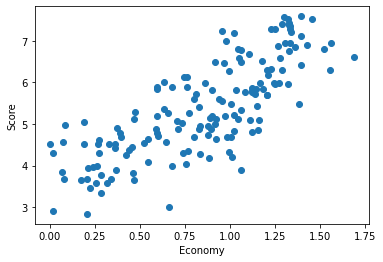

In [13]:
plt.scatter(df_2015.Economy, df_2015.Score)
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

# Linear Regression 
Test to see if there is a correlation between Economy and Happiness Score

In [14]:
# Split dependent and independent variables
X = df_2015.Economy.values.reshape(-1, 1)
X.shape

(158, 1)

In [15]:
y = df_2015.Score

In [16]:
# Build Linear Regression model 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
# Prediction
y_pred = model.predict(X)
print(y_pred.shape)

(158,)


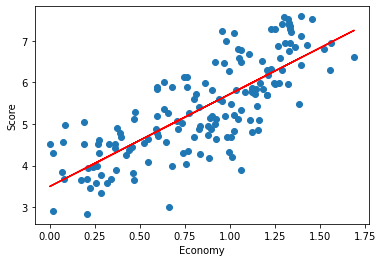

[2.21822712]


In [18]:
# Plot predictions 
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

# Neural Network
Using all 6 factors: 

Economy, Social_Support, Life_Expectancy, Freedom, Perceptions_of_Corruption, Generosity

In [23]:
# Remove country and score from features data
y_2 = df_2015.Score
X_2 = df_2015.drop(columns=['Country', 'Score'])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=69)

In [24]:
# define Linear Regression model 
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# Evaluate the model
y_pred2 = model.score(X_test, y_test)
print(f" Linear regression model accuracy: {y_pred2:.3f}")

 Linear regression model accuracy: 0.769


In [25]:
# define basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(25, input_dim=6, activation='relu', kernel_initializer='he_uniform'))
nn_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile the Sequential model together and customize metrics
nn_model.compile(loss='mse', optimizer='adam')

# train model
fit_model = nn_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, verbose=0)

Train: 0.305, Test: 0.310


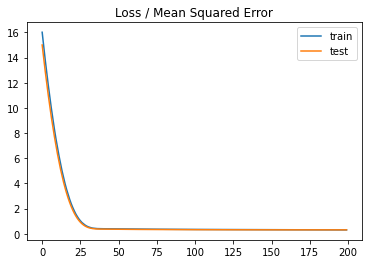

In [26]:
# evaluate the model
train_mse = nn_model.evaluate(X_train, y_train, verbose=0)
test_mse = nn_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(fit_model.history['loss'], label='train')
plt.plot(fit_model.history['val_loss'], label='test')
plt.legend()
plt.show()